#### Key Summary  

1. Temperatures appear to reach the highest near 20 degrees latitude.
2. Temperatures are higher at latitudes closer to the equator. Temperatures are lower towards the earth's poles.
3. The datasets for cloudiness and wind speed don't seem to have any correlation to latitude, or proximity to the equator.

In [21]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key
import numpy as np
from ratelimiter import RateLimiter
from citipy import citipy
from scipy.stats import linregress

output_data_file = "output_data/cities.csv" #Output csv file 

# Range of latitudes and longitudes
lat_range = (-70, 70) #using -70/80 as there are less cities near the poles
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

523

In [3]:
#Perform API Calls------------------------------------------- 

#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1  

# 60 calls/minute or 1,000,000 calls/month LIMIT for FREE API https://openweathermap.org/price 
rate_limiter = RateLimiter(max_calls=60, period=60)  


#Perform API Calls-------------------------------------------  


base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


#For loop matching city names with city_list using enumerate method

for index, city in enumerate(cities, start = 1):
    with rate_limiter:
        try:
            response = requests.get(query_url + city).json()
            city_list.append(response["name"])
            cloud_list.append(response["clouds"]["all"])
            country_list.append(response["sys"]["country"])
            date_list.append(response["dt"])
            humidity_list.append(response["main"]["humidity"])
            lats_list.append(response["coord"]["lat"])
            lngs_list.append(response["coord"]["lon"])
            temp_max_list.append(response['main']['temp_max'])
            wind_speed_list.append(response["wind"]["speed"])

            if index_counter > 49:
                index_counter = 0
                set_counter = set_counter + 1

            else:
                index_counter = index_counter + 1

            print(f"Processing Record {index_counter} of Set {set_counter} : {city}")

        except(KeyError, IndexError):
            print("City not found. Skipping...")

print("-------------------------------")
print("Data received from OpenWeather API")
print("-------------------------------")
            

Processing Record 1 of Set 1 : sangueya
Processing Record 2 of Set 1 : arraial do cabo
Processing Record 3 of Set 1 : djambala
City not found. Skipping...
Processing Record 4 of Set 1 : butaritari
Processing Record 5 of Set 1 : te anau
Processing Record 6 of Set 1 : nikolskoye
Processing Record 7 of Set 1 : kapuskasing
Processing Record 8 of Set 1 : jamestown
Processing Record 9 of Set 1 : la huerta
Processing Record 10 of Set 1 : northam
Processing Record 11 of Set 1 : lochgilphead
Processing Record 12 of Set 1 : balabac
Processing Record 13 of Set 1 : pisco
Processing Record 14 of Set 1 : kawalu
Processing Record 15 of Set 1 : matara
Processing Record 16 of Set 1 : praya
Processing Record 17 of Set 1 : hervey bay
Processing Record 18 of Set 1 : lamu
Processing Record 19 of Set 1 : orlik
City not found. Skipping...
Processing Record 20 of Set 1 : dunedin
Processing Record 21 of Set 1 : cape town
Processing Record 22 of Set 1 : hobart
Processing Record 23 of Set 1 : vanimo
Processing R

Processing Record 40 of Set 4 : porto santo
Processing Record 41 of Set 4 : isla vista
Processing Record 42 of Set 4 : erzin
City not found. Skipping...
Processing Record 43 of Set 4 : seoul
Processing Record 44 of Set 4 : beyneu
Processing Record 45 of Set 4 : cervia
Processing Record 46 of Set 4 : chapais
Processing Record 47 of Set 4 : coahuayana
Processing Record 48 of Set 4 : bathsheba
Processing Record 49 of Set 4 : cepu
Processing Record 50 of Set 4 : betong
Processing Record 0 of Set 5 : visnes
Processing Record 1 of Set 5 : constitucion
Processing Record 2 of Set 5 : lethem
Processing Record 3 of Set 5 : palmer
Processing Record 4 of Set 5 : dawei
Processing Record 5 of Set 5 : harper
Processing Record 6 of Set 5 : aneho
Processing Record 7 of Set 5 : broome
City not found. Skipping...
Processing Record 8 of Set 5 : monrovia
Processing Record 9 of Set 5 : wiang sa
Processing Record 10 of Set 5 : geraldton
City not found. Skipping...
Processing Record 11 of Set 5 : saint-philip

Processing Record 27 of Set 8 : kazerun
Processing Record 28 of Set 8 : nome
Processing Record 29 of Set 8 : nanhai
Processing Record 30 of Set 8 : mandalgovi
Processing Record 31 of Set 8 : lagoa
Processing Record 32 of Set 8 : slave lake
Processing Record 33 of Set 8 : plerin
Processing Record 34 of Set 8 : bonthe
Processing Record 35 of Set 8 : verkhnevilyuysk
Processing Record 36 of Set 8 : nortelandia
Processing Record 37 of Set 8 : stokmarknes
Processing Record 38 of Set 8 : rio gallegos
Processing Record 39 of Set 8 : pachino
Processing Record 40 of Set 8 : faya
Processing Record 41 of Set 8 : katav-ivanovsk
Processing Record 42 of Set 8 : simbahan
Processing Record 43 of Set 8 : zhezkazgan
Processing Record 44 of Set 8 : guerrero negro
Processing Record 45 of Set 8 : inta
Processing Record 46 of Set 8 : channel-port aux basques
Processing Record 47 of Set 8 : natal
Processing Record 48 of Set 8 : alta floresta
Processing Record 49 of Set 8 : xuddur
Processing Record 50 of Set 8

In [7]:
#Create a dataframe using information from data retrieval
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})

#Count weather data
weather_data.count()

City          483
Lat           483
Lng           483
Max Temp      483
Humidity      483
Clouds        483
Wind Speed    483
Country       483
Date          483
dtype: int64

In [8]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Sanguéya,10.7000,-14.3667,67.14,89,22,3.24,GN,1613190637
1,Arraial do Cabo,-22.9661,-42.0278,75.58,88,100,13.91,BR,1613190637
2,Djambala,-2.5447,14.7533,69.89,90,89,3.78,CG,1613190637
3,Butaritari,3.0707,172.7902,81.52,82,3,11.07,KI,1613190637
4,Te Anau,-45.4167,167.7167,65.66,42,64,7.96,NZ,1613190637


In [10]:
#Save weather data to a cities csv file
weather_data.to_csv("Resources/cities.csv", index=False)

### The first requirement is to create a series of scatter plots to showcase the following relationships:  
Temperature (F) vs. Latitude  
Humidity (%) vs. Latitude  
Cloudiness (%) vs. Latitude  
Wind Speed (mph) vs. Latitude  


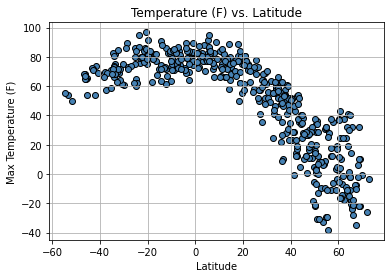

In [12]:
#Temperature (F) vs. Latitude scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Max Temperature.png")

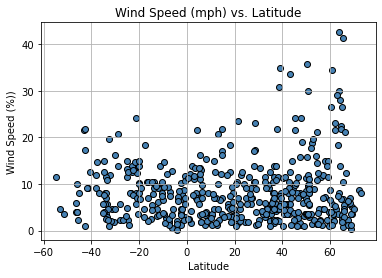

In [13]:
#Wind Speed (mph) vs. Latitude scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Wind Speed.png")

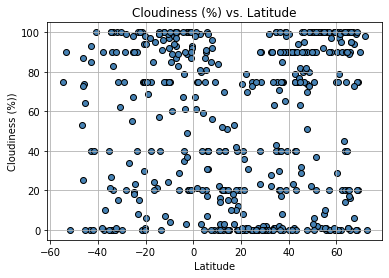

In [14]:
#Cloudiness (%) vs. Latitude scatter plot
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Cloudiness.png")

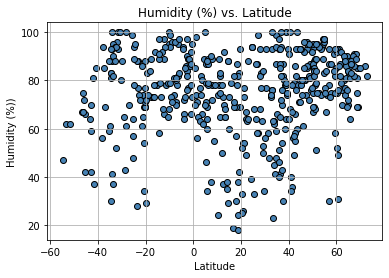

In [15]:
#Humidity (%) vs. Latitude scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(True)
plt.savefig("../Images/City Latitude vs Humidity.png")

### The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

Northern Hemisphere - Temperature (F) vs. Latitude  
Southern Hemisphere - Temperature (F) vs. Latitude  
Northern Hemisphere - Humidity (%) vs. Latitude  
Southern Hemisphere - Humidity (%) vs. Latitude  
Northern Hemisphere - Cloudiness (%) vs. Latitude  
Southern Hemisphere - Cloudiness (%) vs. Latitude  
Northern Hemisphere - Wind Speed (mph) vs. Latitude  
Southern Hemisphere - Wind Speed (mph) vs. Latitude  

In [18]:
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

The linear equation is: y = -1.49x + 94.93
The r value is: 0.7688671899348298


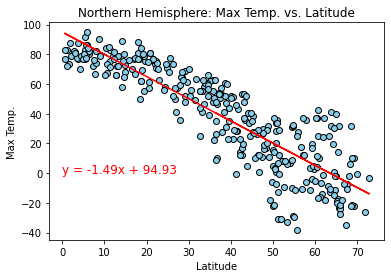

In [25]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, "r-")
plt.title("Northern Hemisphere: Max Temp. vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq, (0,0), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/north_maxtemp_latitude_lr.png")

The linear equation is: y = 0.31x + 81.74
The r value is: 0.2386108249377058


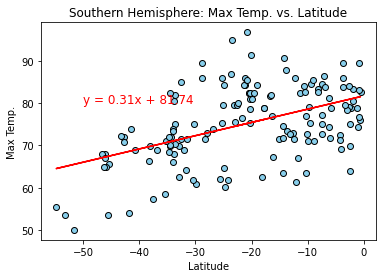

In [26]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Max Temp. vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp.")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/south_maxtemp_latitude_lr.png")

The linear equation is: y = 0.28x + 63.69
The r value is: 0.09053114939449085


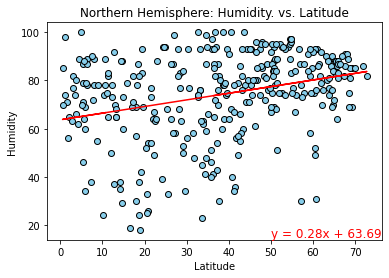

In [29]:
y_values = northern_hemisphere["Humidity"]
x_values = northern_hemisphere["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Humidity. vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (50,15), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/north_humidity_latitude_lr.png")

The linear equation is: y = 0.36x + 84.37
The r value is: 0.09402112146728982


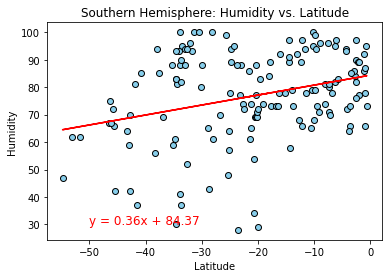

In [30]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq, (-50,30), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/south_humidity_latitude_lr.png")

The linear equation is: y = 0.5x + 31.83
The r value is: 0.06131870212491352


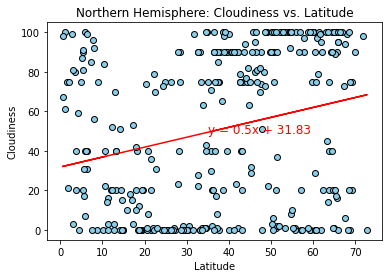

In [31]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (35,49), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/north_cloudiness_latitude_lr.png")

The linear equation is: y = 0.71x + 74.71
The r value is: 0.06859368470125513


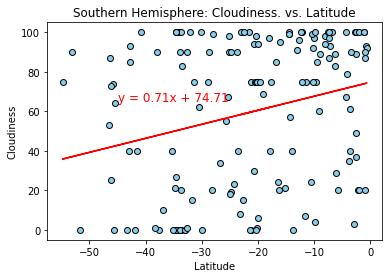

In [32]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Cloudiness. vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq, (-45,65), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/south_cloudiness_latitude_lr.png")

The linear equation is: y = 0.04x + 6.97
The r value is: 0.01109306266197361


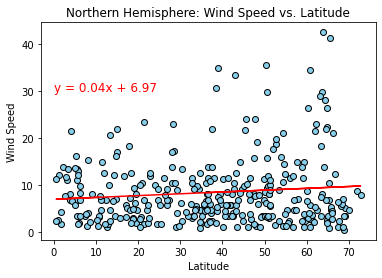

In [33]:

x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (0,30), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/north_windspeed_latitude_lr.png")

The linear equation is: y = -0.06x + 6.51
The r value is: 0.029695545399958622


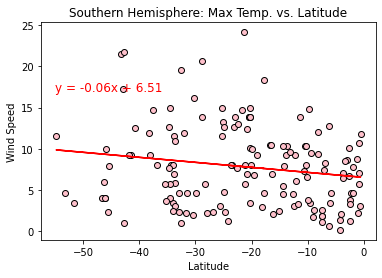

In [35]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, edgecolor="black", facecolor="pink")
plt.plot(x_values, regress_values, 'r-')
plt.title("Southern Hemisphere: Max Temp. vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq, (-55,17), fontsize=12, color="red")
print(f"The linear equation is: {line_eq}")
print(f"The r value is: {rvalue**2}")
plt.savefig("../Images/south_windspeed_latitude_lr.png")